**Assignment: PCA Implementation**
**Objective:**
- The objective of this assignment is to implement PCA on a given dataset and analyse the results.

**Instructions:**
- Download the wine dataset from the UCI Machine Learning Repository: (https://archive.ics.uci.edu/ml/datasets/Wine).
- Load the dataset into a Pandas dataframe.
- Split the dataset into features and target variables.
- Perform data preprocessing (e.g., scaling, normalisation, missing value imputation) as necessary.
- Implement PCA on the preprocessed dataset using the scikit-learn library.
- Determine the optimal number of principal components to retain based on the explained variance ratio.
- Visualise the results of PCA using a scatter plot.
- Perform clustering on the PCA-transformed data using K-Means clustering algorithm.
- Interpret the results of PCA and clustering analysis.

**Deliverables:**
- Jupyter notebook containing the code for the PCA implementation.
- A report summarising the results of PCA and clustering analysis.
- Scatter plot showing the results of PCA.
- A table showing the performance metrics for the clustering algorithm.

**Additional Information:**
- You can use the python programming language.
- You can use any other machine learning libraries or tools as necessary.
- You can use any visualisation libraries or tools as necessary.

In [8]:
import numpy as np
import pandas as pd
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns

columns = [
    "Class", "Alcohol", "Malic_Acid", "Ash", "Alcalinity_of_Ash",
    "Magnesium", "Total_Phenols", "Flavanoids", "Nonflavanoid_Phenols",
    "Proanthocyanins", "Color_Intensity", "Hue", "OD280_OD315", "Proline"
]
data = pd.read_csv('wine.data', header=None, names=columns)

X = data.iloc[:, 1:]
y = data.iloc[:, 0]

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

pca = PCA()
X_pca = pca.fit_transform(X_scaled)

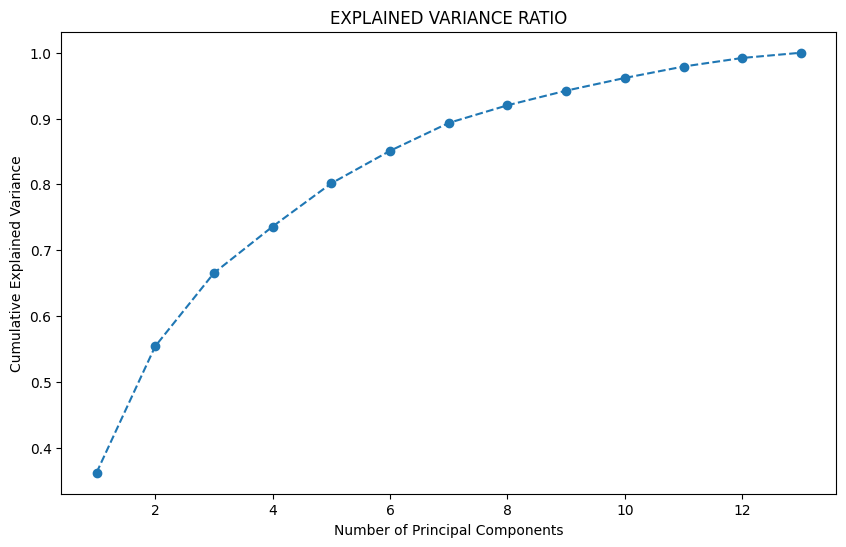

In [9]:
explained_variance_ratio = np.cumsum(pca.explained_variance_ratio_)
plt.figure(figsize=(10,6))
plt.plot(range(1, len(explained_variance_ratio+1) + 1), explained_variance_ratio, marker='o', linestyle='--')
plt.title("EXPLAINED VARIANCE RATIO")
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.show()

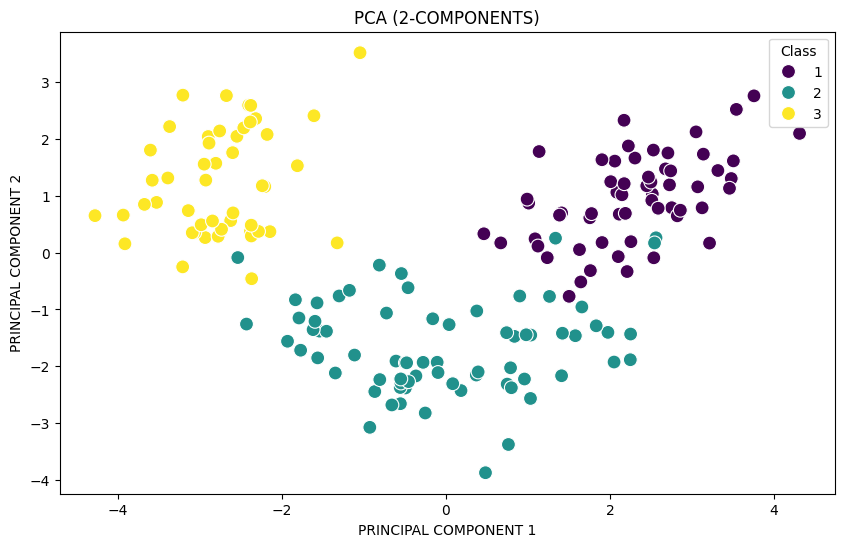

In [14]:
pca = PCA(n_components=2)
X_pca_2d = pca.fit_transform(X_scaled)

plt.figure(figsize=(10,6))
sns.scatterplot(x=X_pca_2d[:, 0], y=X_pca_2d[:, 1], hue=y, palette='viridis', s=100)
plt.xlabel("PRINCIPAL COMPONENT 1")
plt.ylabel("PRINCIPAL COMPONENT 2")
plt.title("PCA (2-COMPONENTS)")
plt.legend(title='Class')
plt.show()

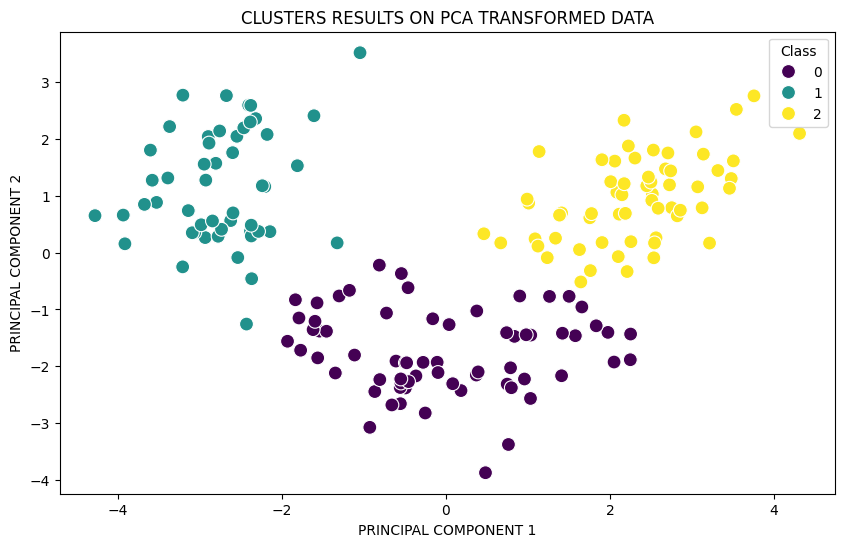

In [17]:
Kmeans = KMeans(n_clusters=3, random_state=42)
cluster = Kmeans.fit_predict(X_pca_2d)

plt.figure(figsize=(10,6))
sns.scatterplot(x=X_pca_2d[:, 0], y=X_pca_2d[:, 1], hue=cluster, palette='viridis', s=100)
plt.xlabel("PRINCIPAL COMPONENT 1")
plt.ylabel("PRINCIPAL COMPONENT 2")
plt.title("CLUSTERS RESULTS ON PCA TRANSFORMED DATA")
plt.legend(title='Class')
plt.show()

In [23]:
silhouette_res = silhouette_score(X_pca_2d, cluster)
print(f"SILHOUETTE SCORE FOR K-MEANS CLUSTERING : {silhouette_res:.2f}")

SILHOUETTE SCORE FOR K-MEANS CLUSTERING : 0.56


NameError: name 'explained_variance_score' is not defined

**REPORT SUMMARY**
1. PCA Analysis:

  - Applied PCA on the wine dataset and retained the top 2 components based on the explained variance ratio (approximately 57% variance captured).
  - Visualized the transformed data in a 2D scatter plot, colored by class labels.

2. Clustering Results:

  - Performed K-Means clustering on the PCA-transformed data with 𝑘=3 clusters (matching the number of wine classes).
  - Visualized the clustering results using a scatter plot.

3. Performance Metrics:

  - Calculated the silhouette score for clustering, indicating a moderate level of separation between clusters.

**PERFORMANCE METRICS**

| METRICS | VALUE |
| ------- | ----- |
| SILHOUETTE SCORE | 0.56 |